In [1]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
  
#importing datasets  
data= pd.read_csv('C:/Users/Suhas/Downloads/Crop_recommendation.csv') 
val = ['rice', 'maize', 'chickpea', 'mungbean', 'blackgram', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'coffee']
data=data[data['label'].isin(val)]

In [2]:
x= data.drop('label',axis=1) 
y= data[['label']]
x,y

(        N   P   K  temperature   humidity        ph    rainfall
 0      90  42  43    20.879744  82.002744  6.502985  202.935536
 1      85  58  41    21.770462  80.319644  7.038096  226.655537
 2      60  55  44    23.004459  82.320763  7.840207  263.964248
 3      74  35  40    26.491096  80.158363  6.980401  242.864034
 4      78  42  42    20.130175  81.604873  7.628473  262.717340
 ...   ...  ..  ..          ...        ...       ...         ...
 2195  107  34  32    26.774637  66.413269  6.780064  177.774507
 2196   99  15  27    27.417112  56.636362  6.086922  127.924610
 2197  118  33  30    24.131797  67.225123  6.362608  173.322839
 2198  117  32  34    26.272418  52.127394  6.758793  127.175293
 2199  104  18  30    23.603016  60.396475  6.779833  140.937041
 
 [1600 rows x 7 columns],
        label
 0       rice
 1       rice
 2       rice
 3       rice
 4       rice
 ...      ...
 2195  coffee
 2196  coffee
 2197  coffee
 2198  coffee
 2199  coffee
 
 [1600 rows x 1 column

In [3]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.40, random_state=0)

In [4]:
x_test.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [5]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
y_pred= classifier.predict(data.iloc[:,:7]) 
df = pd.DataFrame()

In [7]:
from sklearn.metrics import accuracy_score
# mean_squared_error(y_test,preds)
accuracy_score(data['label'], y_pred)

0.998125

In [8]:
from sklearn import tree
text_representation = tree.export_text(classifier,feature_names=[i for i in data.columns if not i =="label"])
print(text_representation)

|--- K <= 35.50
|   |--- humidity <= 74.92
|   |   |--- N <= 59.50
|   |   |   |--- P <= 47.50
|   |   |   |   |--- class: mango
|   |   |   |--- P >  47.50
|   |   |   |   |--- class: blackgram
|   |   |--- N >  59.50
|   |   |   |--- rainfall <= 112.45
|   |   |   |   |--- class: maize
|   |   |   |--- rainfall >  112.45
|   |   |   |   |--- class: coffee
|   |--- humidity >  74.92
|   |   |--- P <= 32.50
|   |   |   |--- rainfall <= 125.24
|   |   |   |   |--- humidity <= 89.71
|   |   |   |   |   |--- class: pomegranate
|   |   |   |   |--- humidity >  89.71
|   |   |   |   |   |--- class: orange
|   |   |   |--- rainfall >  125.24
|   |   |   |   |--- class: coconut
|   |   |--- P >  32.50
|   |   |   |--- temperature <= 26.93
|   |   |   |   |--- rainfall <= 147.56
|   |   |   |   |   |--- class: cotton
|   |   |   |   |--- rainfall >  147.56
|   |   |   |   |   |--- class: rice
|   |   |   |--- temperature >  26.93
|   |   |   |   |--- class: mungbean
|--- K >  35.50
|   |--- K 

In [9]:
import matplotlib.pyplot as plt

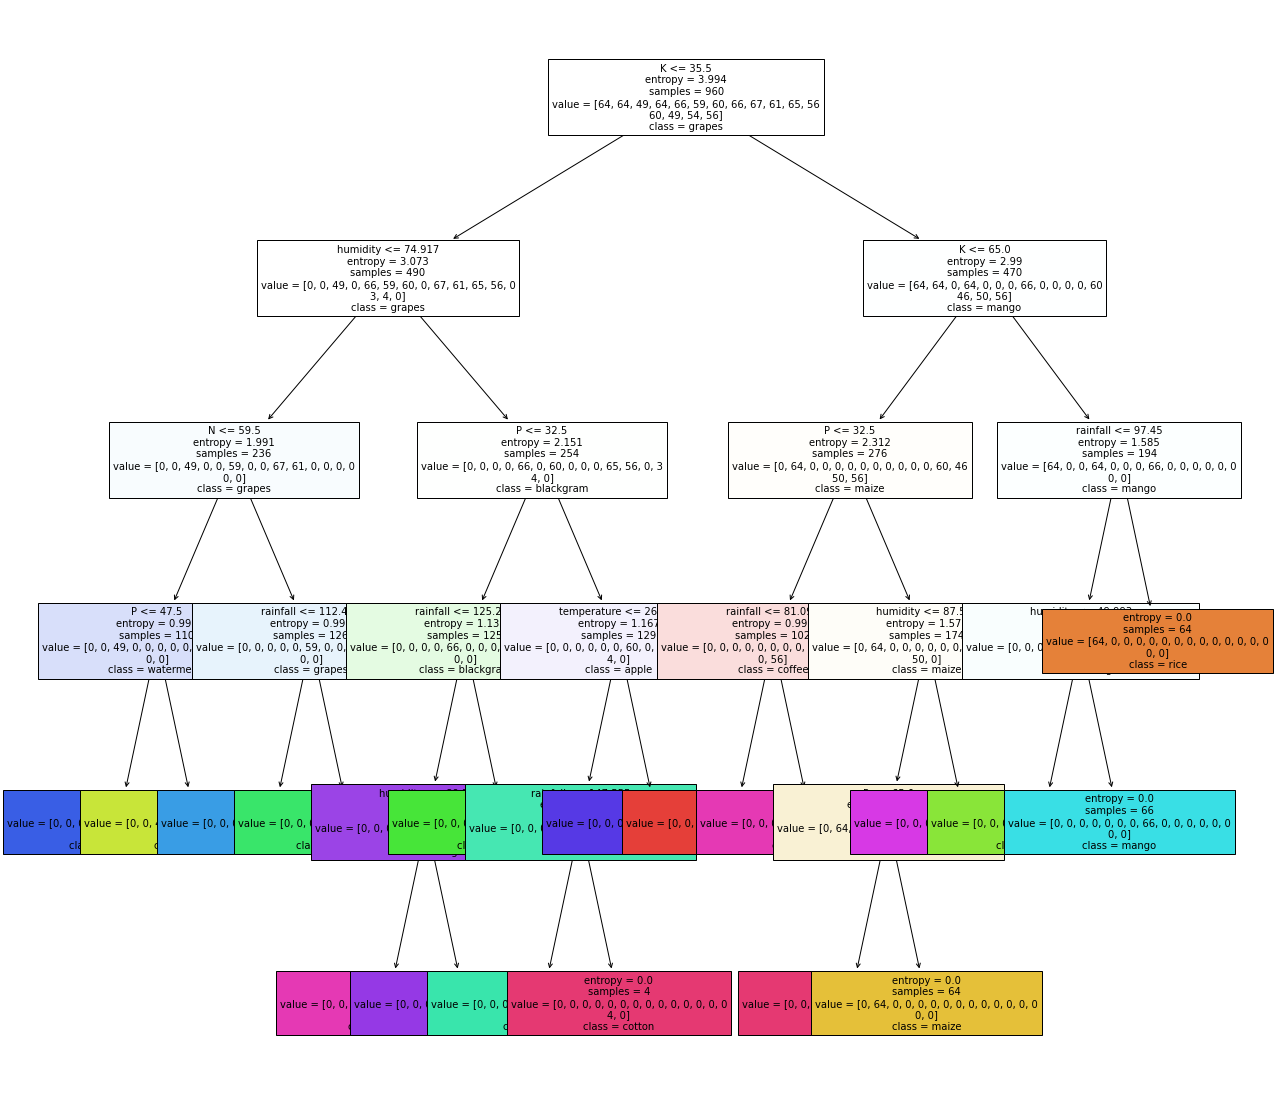

In [10]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(classifier,
                   feature_names=data.columns,  
                   class_names=val,fontsize=10,
                   filled=True)

In [11]:
import numpy as np
y_train = np.array(y_train, dtype=object)